# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

## 1
Given the considerable size of the considerable size of the sample **a Z-test will certainly be the appropriate test to use**. Above, I import the necessary libraries and import the data. Below, I trim down the data set to 'focus' in order to have a more manageable dataframe to work with. From there, 'focus' is split according to the race variable in order to do a group comparison and Z-test.

In [12]:
focus = data[['race','education','sex','yearsexp','call']]
white = focus[focus.race=='w']
black = focus[focus.race=='b']

In [13]:
wht_dist= np.empty(1000)
blk_dist = np.empty(1000)
total_dist = np.empty(1000)

def getprobs_reps(fill_list,target):
    for a in range(1000):    
        perm = np.random.choice(target,size=2435)
        fill_list[a] = perm.sum()/len(perm)
    return fill_list

total_set = getprobs_reps(total_dist,focus.call)
wht_set = getprobs_reps(wht_dist,white.call)
blk_set = getprobs_reps(blk_dist,black.call)

## 1 cont.
To check for normality and ensure that CLT is a feasible framework on which to operate, I create permutation samples and calculate the proportion of call backs for each sample. Those proportions are then dropped into a corresponding array (e.g. blk_dist) for further analysis. The function 'getprobs_reps' does all of this using the aforementioned array and the variable of interest.

When the total proportion replicates are plotted alongside a normal distribution as they are below, we can see that the permutated population is approximately normally distributed.

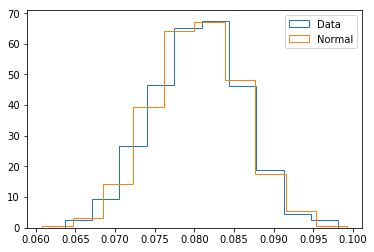

In [14]:
mean = np.mean(total_set)
std = np.std(total_set)
theory = np.random.normal(mean,std,10000)

_ = plt.hist(total_set,normed=True,histtype='step')
_ = plt.hist(theory,normed=True,histtype='step')
plt.legend(('Data','Normal'),loc='best')
plt.show()

In [15]:
def proportion(target):
    frac = (target==1).sum()
    prop = (frac/len(target))*100
    return prop

print(proportion(white.call),'% of black sounding names got call backs')
print(proportion(black.call),'% of white sounding names got call backs')

9.65092402464 % of black sounding names got call backs
6.4476386037 % of white sounding names got call backs


## 2
**The null hypothesis here is that there is no difference between the call back rate of black sounding names versus white sounding names, leave the converse of this to be our alternative hypothesis**. The function above shows us that the observed data already has a considerable discrepancy between white and black names, but to make a more definitive comparison I will use the 'getprobs_reps' function again below to create permutated arrays for each group.

## 3
The **margin of error and confidence interval for each of the groups are calculated** below and we can see that, even given the confidence interval, the distributions of the black and white sounding name never even approach one another. Indeed out **Z-test tells us that they are very significantly different distributions with a p value of <.01

Z-test results:  statistic = 129.956129953 p = 0.0
white: [  8.50102669  10.80082136] black: [ 5.50308008  7.43326489] <-- confidence interval (% call back)
6.46529774127  +/- 1.01331105125 <--margin of error blk(% call back)
9.64648870637  +/- 1.16947930887 <--margin of error wht(% call back)


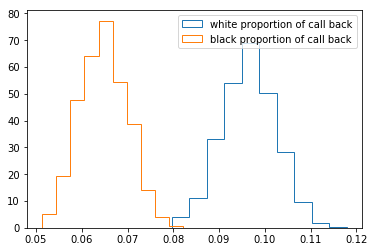

In [16]:
from statsmodels.stats.weightstats import ztest

ztest = ztest(wht_set,blk_set,value=0)
print('Z-test results: ','statistic =',ztest[0],'p =',ztest[1])
con_wht = np.percentile(wht_set,[2.5,97.5])
con_blk = np.percentile(blk_set,[2.5,97.5])
print('white:',con_wht*100,'black:',con_blk*100,'<-- confidence interval (% call back)')
print(blk_set.mean()*100,' +/-',(blk_set.std()*100)*2,'<--margin of error blk(% call back)')
print(wht_set.mean()*100,' +/-',(wht_set.std()*100)*2,'<--margin of error wht(% call back)')

_ = plt.hist(wht_set,normed=True,histtype='step')
_ = plt.hist(blk_set,normed=True,histtype='step')
plt.legend(('white proportion of call back','black proportion of call back'),loc='best')
plt.show()

## 4
This result is very strong evidence that the call back rate is significantly difference between white and black soundings name with black sounding names receiving consistently fewer call backs. I simulated the data to generate 1000 more samples and still the call back rate was much different between the 2 groups. This suggests that no matter the sample size the researchers might have taken, we would expect to see the same result in call back rate disparity.

## 5
While race was shown to be an important factor through this analysis, I did not control for other variables that may impact the result as well. The reason that the 'focus' dataframe contains columns other than race and call back is because I felt that those were variables that could also possibly explain the difference in call back rate. Things like education or years of experience may coincidentally coincide with race such that if were factored them into our analysis we would see less of a discrepancy between the groups. To make the claim that race is the most important factor in call back rate, I would restructure the analysis to determine if the call back rate for the highly educated and highly experienced of both groups is significantly different. This approach could possible change our conclusion as the call back rate may be very similar across the highly educated, or it could further bolster the claim that race is the most important factor by remaining significantly different.